In [120]:
import pandas as pd
import textblob
import nltk
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from nltk import *
from textblob import TextBlob
from plotly.subplots import make_subplots
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk.corpus import stopwords
import plotly.graph_objects as go
nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [5]:
df_test = pd.read_csv("/content/test_data.txt")
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2334 entries, 0 to 2333
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   text            2331 non-null   object
 1   hashtags        2334 non-null   object
 2   geography       2 non-null      object
 3   reply_count     2334 non-null   int64 
 4   retweet_count   2334 non-null   int64 
 5   favorite_count  2334 non-null   int64 
 6   timestamp       2332 non-null   object
 7   source          2332 non-null   object
dtypes: int64(3), object(5)
memory usage: 146.0+ KB


In [154]:
df_new = df_test[df_test['text'] != 'None']#selecting all values in text except None 
df_new.reset_index(inplace= True)
df_new.drop(columns = ('index'),inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [156]:
df_new.text = df_new.text.astype(str) #converting all text to string
n = df_new.text.shape[0]
text_list = []
sentiment_l = []
polarity_l = []
subjectivity_l = []
for i in range (0,n):
  x = df_new.text.loc[i]
  text = TextBlob(x)
  if text != 'None':
    text_list.append(text)
for blob in text_list:
  sentence = blob.sentences
  sentiment = blob.sentiment
  sentiment_l.append(sentiment)
  polarity =  sentiment.polarity
  polarity_l.append(polarity)
  subjectivity = sentiment.subjectivity
  subjectivity_l.append(subjectivity)

df_new['polarity'] = polarity_l
df_new['subjectivity'] = subjectivity_l
df_new['sentiment'] = sentiment_l


/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5303: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-d

# **Word Cloud**


In [0]:
def word_cloud_gen(tweet_text): #generate wordcloud from the dataframe textcolumn 
  txt = tweet_text.str.cat(sep = ' ')
  stop = stopwords.words('english') #removing english stopwords
  stop.append('RT')
  stop.append('None')
  wordcloud = WordCloud(stopwords = stop,background_color="black",
                      max_font_size=100,
                      max_words=500).generate(txt)

  plt.figure( figsize=(15,10), facecolor='k')
  plt.tight_layout(pad=0)
  plt.axis('off')
  plt.imshow(wordcloud,interpolation= 'bilinear')
  plt.show()
  return plt.show()

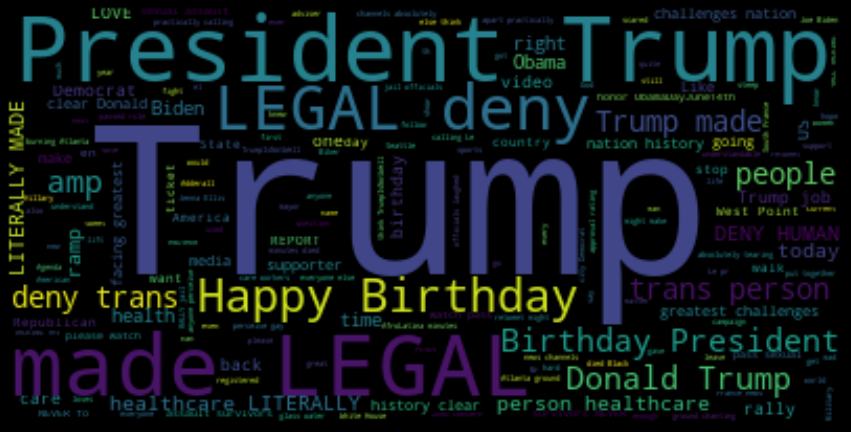

In [169]:
word_cloud_gen(df_new.text)

# **Heatmap of user sentiment**

In [0]:
def polarity_plot(polarity_df): #generate polarity plot from polarity column in dataframe
  z = np.sort(np.asarray(polarity_df))
  fig = make_subplots(rows=2, 
        cols=1,
        subplot_titles=("Heatmap of user sentiments(Polarity)",
                          "Sentiment Distribution(Polarity)"
                                    ))
   #heatmap   

  fig.add_trace(go.Heatmap(z= [z],
          type = 'heatmap',
          colorscale = 'Viridis',zmax = 1,zmin = -1,
          showscale = False),row=1, col=1)
  #histogram

  fig.add_trace(go.Histogram(x= polarity_df,
                name='polarity',
                xbins= dict(start = -1.0,
                end = 1.0)),row=2, col=1)
  
  fig.update_layout(autosize=False,
                width=800,
                height=500,
                title_text='Sentiment Distribution')
  plt.figure(figsize= (15,10))
  fig.update_traces(opacity=0.75)
  return fig.show()


In [162]:
polarity_plot(df_new.polarity)

In [0]:
def subjectivity_plot(subjectivity_df):
  z = np.sort(np.asarray(subjectivity_df))

  fig = make_subplots(rows=2, cols=1,subplot_titles=("Heatmap of user sentiments(Subjectivity)",
                                                     "Sentiment Distribution(Subjectivity)"
   #heatmap                                                  ))
  fig.add_trace(go.Heatmap(z= [z],
                                type = 'heatmap',name = 'subjectivity',
          colorscale = 'Viridis',zmax = 1,zmin = -1,showscale = False),row=1, col=1)
 
  #histogram
  fig.add_trace(go.Histogram(x= subjectivity_df,name='subjectivity(0-1)',
                              xbins= dict(start = 0,
                                          end = 1.0)),row=2, col=1)
  fig.update_layout(autosize=False,
      width=800,
      height=500,
      title_text='Sentiment Distribution')
  plt.figure(figsize = (15,10))
  return fig.show()


In [167]:
subjectivity_plot(df_new.subjectivity)

<Figure size 1080x720 with 0 Axes>

**Tweets samples with positive polarity**

In [124]:
df_new['text'].loc[df_new.polarity >= 0.8].sample(5) #samples of tweets with higher polarity


183      Happy Birthday President Trump Have a great day
9                      RT HAPPY BIRTHDAY PRESIDENT TRUMP
196    RT Donald Trump gave up his billionaire lifest...
142                    RT Happy Birthday President Trump
109                       Happy Birthday President Trump
Name: text, dtype: object

Tweet samples with negative polarity

In [0]:
df_new['text'].loc[df_new.polarity < 0].sample(5).values #samples of tweets with negative polarity

array(['New Polls shows Trump up by largest margin to date Voters reject Biden s failed policy cognitive decline racist',
       'RT From February Trump has delayed justice long enough HoldTrumpAccountable',
       'RT Polling Updated Presidential Model Electoral Votes Biden 384 Trump 154 Pop Vote Biden 53 Trump 43 Other 4',
       'They are desperate We are winning Trump2020LandslideVictory WWG1GWA',
       'RT please don t retweet this it might make mad on his birthday and make everyone else think TrumpIsNotWell s'],
      dtype=object)